# Breast Cancer Prediction
In this machine learning project, we will predict whether a person is suffering from Breast Cancer or not.

### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Loading the Data set

In [17]:
df = pd.read_csv("breast_cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Exploratory Data Analysis (EDA)

Diagnosis is the class label.

In [3]:
# Lets see the name of the features

df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
# Lets check for null values

df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
# Unnamed 32 consists NaN values. ID has no role. Lets drop these two features
## We will divide the dataset into independent and dependent features

Y = df["diagnosis"]   # Will be used later for anlysing countplots to see the proportion of each classes within our target class 
list = ["Unnamed: 32", "id", "diagnosis"]  # We are also removing the target feature for creating a correlation matrix later and checking the correlations between the independent features
x = df.drop(list, axis = 1)
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


C:\Users\SWARNAVA\anaconda3\envs\health\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Number of Benign: 357
Number of Malignant: 212


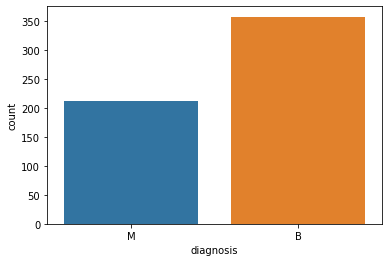

In [6]:
# Countplot for the dependent feature to check the proportion of each class and validate whether the dataset is balanced or not

ax = sns.countplot(Y, label = "Count")
B, M = Y.value_counts()
print("Number of Benign: {}".format(B))
print("Number of Malignant: {}".format(M))

The Dataset is balanced.

In [7]:
# Lets see the desription of the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

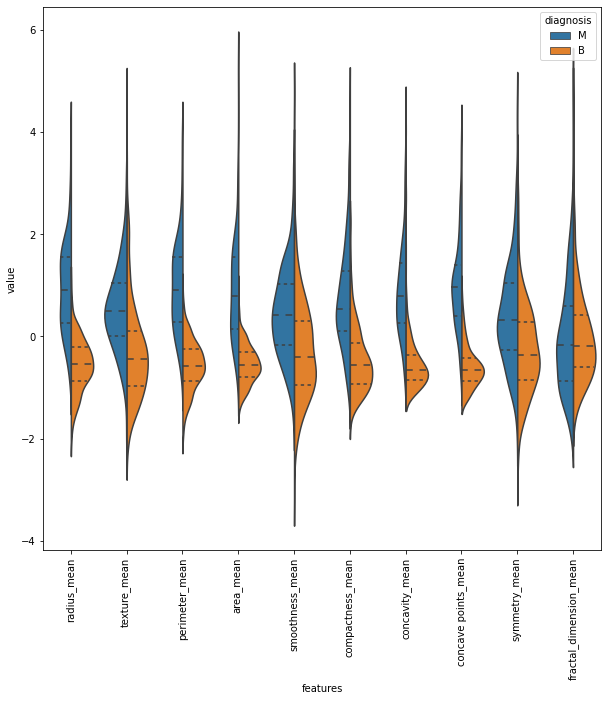

In [8]:
# Violin plots for the first 10 features

data_dia = Y
data = x
data_n_2 = (data - data.mean()) / (data.std()) # Standardization
data = pd.concat([Y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

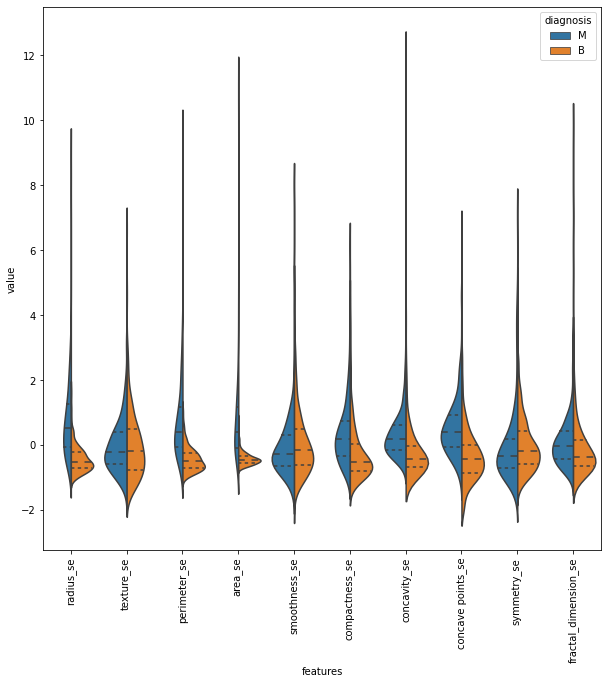

In [9]:
# Violin plot for the next 10 features

data = pd.concat([Y, data_n_2.iloc[:, 10:20]], axis = 1)
data = pd.melt(data, id_vars = "diagnosis", var_name = "features", value_name = "value")

plt.figure(figsize = (10,10))
sns.violinplot(x = "features", y = "value", hue = "diagnosis", data = data, split = True, inner = "quart")
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

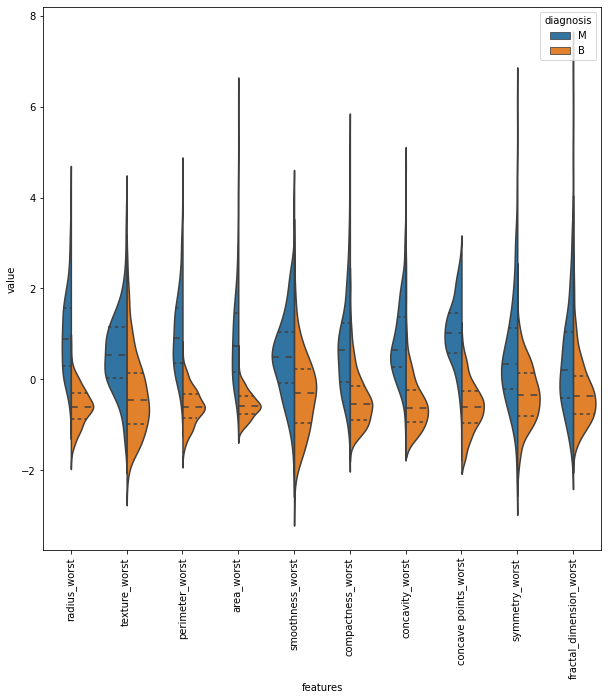

In [10]:
# Violin plots for the last ten features

data = pd.concat([Y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

As an alternative of Violin plot, box plot can be used. Box plots are also useful in terms of seeing outliers.

C:\Users\SWARNAVA\anaconda3\envs\health\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


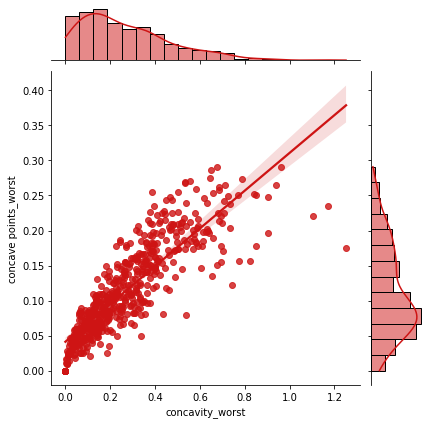

In [11]:
# Joint plots for features concavity_worst and concave points_worst

sns.jointplot(x.loc[:,'concavity_worst'], x.loc[:,'concave points_worst'], kind="reg", color="#ce1414")

These features are highly correlated.

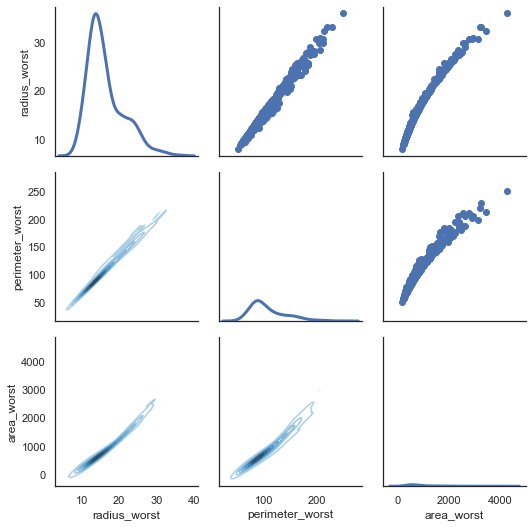

In [12]:
sns.set(style="white")
df = x.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df, diag_sharey=True)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter, cmap="Blues_d")
g.map_diag(sns.kdeplot, lw=3)

<AxesSubplot:>

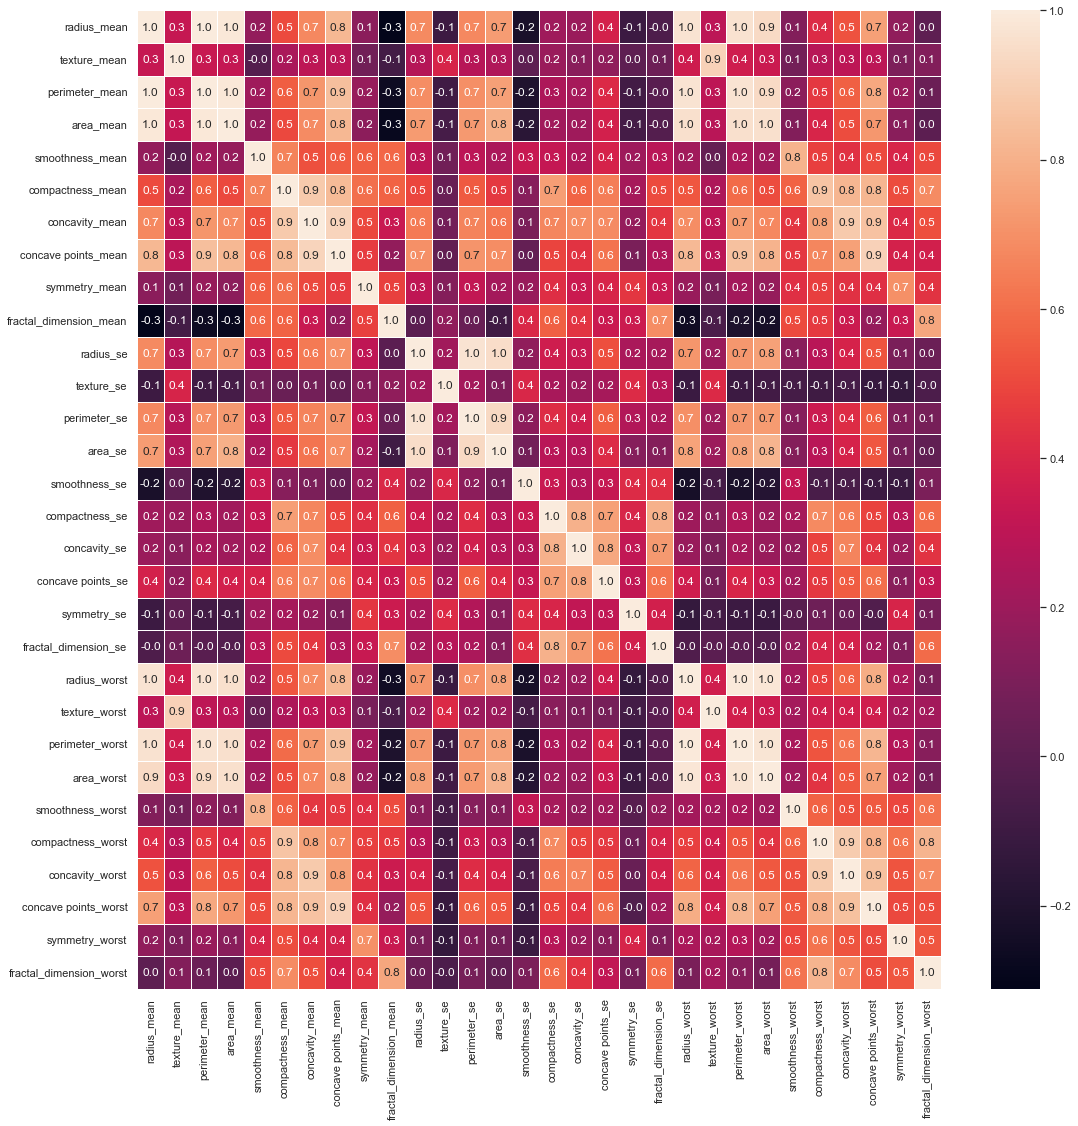

In [13]:
#correlation Heatmap for the independent features

f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

### Feature Engineering

In [19]:
# Split the features data and the target 

Xdata = df.drop(['diagnosis'], axis=1)
ydata = df['diagnosis']

In [20]:
# Encoding the target value 
yenc = np.asarray([1 if c == 'M' else 0 for c in ydata])

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_scale = ['concave points_mean','area_mean','radius_mean','perimeter_mean','concavity_mean']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [39]:
# Feature Selection on selected columns

cols = ['concave points_mean','area_mean','radius_mean','perimeter_mean','concavity_mean']
Xdata = df[cols]
print(Xdata.columns)

Index(['concave points_mean', 'area_mean', 'radius_mean', 'perimeter_mean',
       'concavity_mean'],
      dtype='object')


In [40]:
# Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xdata, yenc, 
                                                    test_size=0.3,
                                                    random_state=43)

In [41]:
# Lets see the shape of our train and test data

print('Shape training set: X:{}, y:{}'.format(X_train.shape, y_train.shape))
print('Shape test set: X:{}, y:{}'.format(X_test.shape, y_test.shape))

Shape training set: X:(398, 5), y:(398,)
Shape test set: X:(171, 5), y:(171,)


### Model Building

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
# Initializing the model

lr = LogisticRegression()

In [44]:
# Fitting the model

model1 = lr.fit(X_train, y_train)

In [45]:
# Predicting

y_pred = model1.predict(X_test)

In [46]:
# Validationg our model

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.935672514619883
[[107   7]
 [  4  53]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       114
           1       0.88      0.93      0.91        57

    accuracy                           0.94       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



### Hyperparameter Optimization

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
# Setting the parameters 

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [49]:
# Initializing Grid Search

clf = GridSearchCV(model1, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [50]:
best_clf = clf.fit(X_train ,y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


C:\Users\SWARNAVA\anaconda3\envs\health\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.61056049 ...        nan 0.9044771  0.90449609]
  category=UserWarning


In [51]:
# Getting the best estimator

best_clf.best_estimator_

LogisticRegression(C=0.23357214690901212, penalty='l1', solver='liblinear')

In [52]:
# Fitting the LR with the best parameters

model = LogisticRegression(C=0.23357214690901212, penalty='l1', solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, penalty='l1', solver='liblinear')

In [53]:
# Predicting

y_pred = model.predict(X_test)

In [54]:
# Validationg our model

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.935672514619883
[[107   7]
 [  4  53]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       114
           1       0.88      0.93      0.91        57

    accuracy                           0.94       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



### Saving the model for future use

In [55]:
import joblib
joblib.dump(model,r"C:\Users\SWARNAVA\Desktop\Healthcare\Cancer\cancer_model.pkl")

['C:\\Users\\SWARNAVA\\Desktop\\Healthcare\\Cancer\\cancer_model.pkl']